# 8.1 First-Order Second-Moment (FOSM) Method Example
Zihan (Zora) Huang (zhuang2@nd.edu) 
July 6th, 2020

### Reliability Methods for Estimating the Probability of Failure
- Reliability methods are a class of techniques that seek to answer the question of with what probability a QoI will cross some threshold value.<br/><br/>

- Reliability methods will try to characterize the safety of the system using a single number, $\beta$ (reliability of index), expressed as the number of standard deviations above the mean performance where the failure point of the system is. <br/><br/>

- Reliability methods try to estimate the system performance using a minimal number of QoI evaluations to infer system behavior, and endeavir that necessarily requires extrapolation from a few data points to an entire distrition. <br/><br/>

- Contrast to previous chapters about sampling, where actual samples from the distribution of the QoI was needed to make statements about a distribution, at a cost of requiring many evaluations of QoI. Fewer evaluations are required in reliability analysis, therefore faster.<br/><br/>

- Simplifications made reliability method less robust, therefore assumptions and approximations in such calculations needs to be clarified.

### 8.1.1 First-Order Second-Moment (FOSM)

The simplest and least expensive type of reliability method involves extending the sensitivity analysis we have already completed to make statments about the values of the distribution. <br/><br/>

The first-order second-moment (FOSM) uses first-order sensitivities to estimate the variance. Using the assumption that the value of QoI at the mean of the inputs is the mean of the QoI: <br/><br/>
![Fig-8.1.1](figures/Fig-8.1.1.png)<br/><br/>
An additional assumption is that the QoI is normal with a known mean and variance.

Using the covariance matrix of the inputs, along with the sensitivities,
$ \frac{dQ}{dx_i}$, to estimate the variance: <br/><br/>
![Fig-8.1.2](figures/Fig-8.1.2.png)<br/><br/>
Q is normally distributed as: <br/><br/>
![Fig-8.1.3](figures/Fig-8.1.3.png)<br/><br/>

Reliability analysis typically rescales the QoI so that the point we are interested in, the so-called failure point, experessed in quantity, $Z$, such that failure occurs when $Z$ < 0. To use the failure value of QoI, $Q_fail$, to define $Z$: <br/><br/>
![Fig-8.1.4](figures/Fig-8.1.4.png)<br/><br/>

The probability of failure is: <br/><br/>
![Fig-8.1.5](figures/Fig-8.1.5.png)<br/><br/>
where $\phi(x)$ is the standard nomral CDF. 

The probability of failure leads toi the defination of the reliability index for the system. The reliability index, $\beta$, is defined as:<br/><br/>

![Fig-8.1.6](figures/Fig-8.1.6.png)<br/><br/>

### 8.1.2 First-Order Second-Moment (FOSM) Exmaple
![Fig-8.1.7](figures/Fig-8.1.7.png)


**Import Libraries**

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

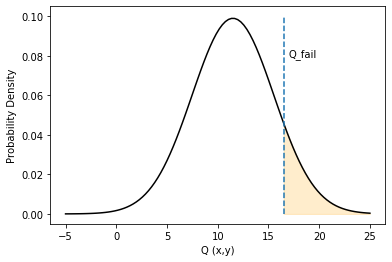

> QoI will be normally distributed with mean 11.5 and standard deviation of 4.031128874149275
> Failure point, Q_fail, is 16.5
> Probability of failure, p_fail, is 0.10742347370282446
> Reliability index, β, is 1.2403473458920846


In [2]:
# Example 8.1: Fig.8.1 FOSM example of linear combination of independent normal random variables

x = np.linspace (-2,10,100)
mean_x = 5
sigma_x = 2
y = x
mean_y = 3
sigma_y = 1

# estimation of mean using EQN. 8.1

Q_xy_mean = 2 * mean_x + 0.5 * mean_y

# estimation of variance using EQN. 4.11

dQdx = 2
dQdy = 0.5
Q_xy_sigma = ((dQdx * sigma_x) ** 2 + (dQdy * sigma_y) ** 2) ** 0.5
Q_xy = 2 * x + 0.5 * y

### plot the QoI PDF

fig, ax = plt.subplots(1, 1)
ax.plot(Q_xy,norm.pdf(Q_xy, loc = Q_xy_mean, scale = Q_xy_sigma),'k')
plt.xlabel("Q (x,y)")
plt.ylabel('Probability Density')

# set up a Q_fail value

Q_fail = 16.5

### plot line of Q_fail

y_lim = np.linspace (0,0.1,100)
ax.plot(Q_fail + 0*y_lim,y_lim + 0*Q_fail, '--')
plt.text(17,0.08, 'Q_fail') # add text

### Plot the shaded area between Q_fail and the PDF

x_overlaplim = np.linspace (Q_fail,25,100)
ax.fill_between(x_overlaplim, 0, norm.pdf(x_overlaplim, loc = Q_xy_mean, scale = Q_xy_sigma) ,
                 facecolor="orange", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)  
plt.show()

# probability of failure

p_fail = 1 - stats.norm.cdf(Q_fail, loc = Q_xy_mean, scale = Q_xy_sigma)

# reliability index 

beta = (Q_fail - Q_xy_mean)/Q_xy_sigma


print('> QoI will be normally distributed with mean',Q_xy_mean, 'and standard deviation of', Q_xy_sigma)
print('> Failure point, Q_fail, is', Q_fail)
print('> Probability of failure, p_fail, is', p_fail)
print('> Reliability index, β, is', beta)